# Classification of Data Sets Using SVM and MLP
## Data Generation and Visualization
Two distinct datasets were created for the study: D1 and D2. Dataset D1 consists of two classes of linearly separable data points, each containing 100 data points per class. In contrast, Dataset D2 comprises two classes of linearly non-separable data points, each also containing 100 data points per class. For both datasets, 10 vectors were randomly selected from each class to form the test sets.

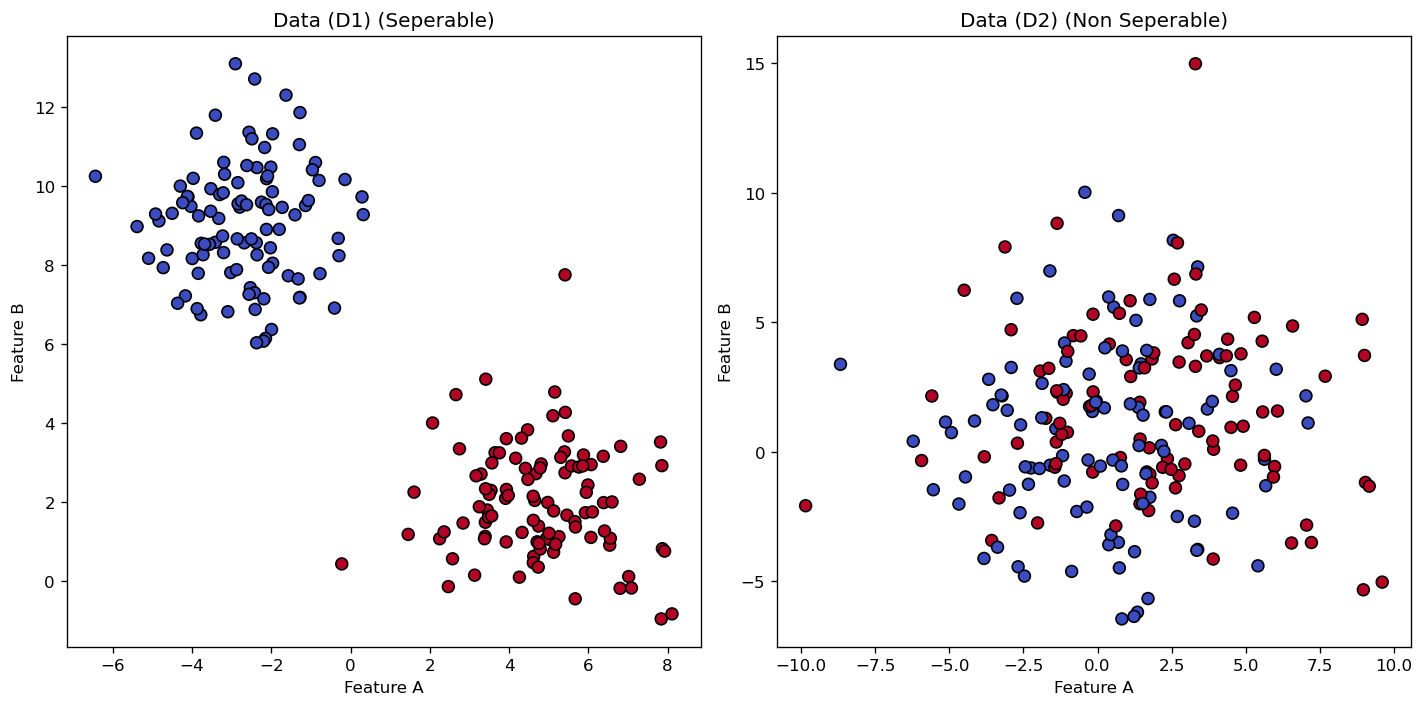

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Function to split the dataset into training and test sets
def splitTrainTest(X, y, testSize=10, randomState=42):
    np.random.seed(randomState)
    trainIdx = []
    testIdx = []

    for classLabel in np.unique(y):
        classIndices = np.where(y == classLabel)[0]
        testIndices = np.random.choice(classIndices, testSize, replace=False)
        trainIndices = np.setdiff1d(classIndices, testIndices)

        testIdx.extend(testIndices)
        trainIdx.extend(trainIndices)

    trainX = X[trainIdx]
    trainY = y[trainIdx]
    testX = X[testIdx]
    testY = y[testIdx]

    return trainX, trainY, testX, testY

# Generate datasets
data1, labels1 = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)
data2, labels2 = make_blobs(n_samples=200, centers=[(0.5, 0.5), (1.5, 1.5)], cluster_std=3.5, random_state=42)

# Split datasets into training and test sets
trainData1, trainLabels1, testData1, testLabels1 = splitTrainTest(data1, labels1, testSize=10, randomState=42)
trainData2, trainLabels2, testData2, testLabels2 = splitTrainTest(data2, labels2, testSize=10, randomState=42)

# Visualize datasets
plt.figure(figsize=(12, 6), dpi=120)

plt.subplot(1, 2, 1)
plt.scatter(data1[:, 0], data1[:, 1], c=labels1, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Data (D1) (Seperable)")
plt.xlabel('Feature A')
plt.ylabel('Feature B')

plt.subplot(1, 2, 2)
plt.scatter(data2[:, 0], data2[:, 1], c=labels2, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Data (D2) (Non Seperable)")
plt.xlabel('Feature A')
plt.ylabel('Feature B')

plt.tight_layout()
plt.show()


## Classification Using Hard-Margin SVM
For the linearly separable dataset D1, a Hard-Margin SVM was applied. The model performed perfectly on the test set, correctly classifying all the data points. This result is expected, as the dataset was designed to be linearly separable, and a Hard-Margin SVM is well-suited to such data.

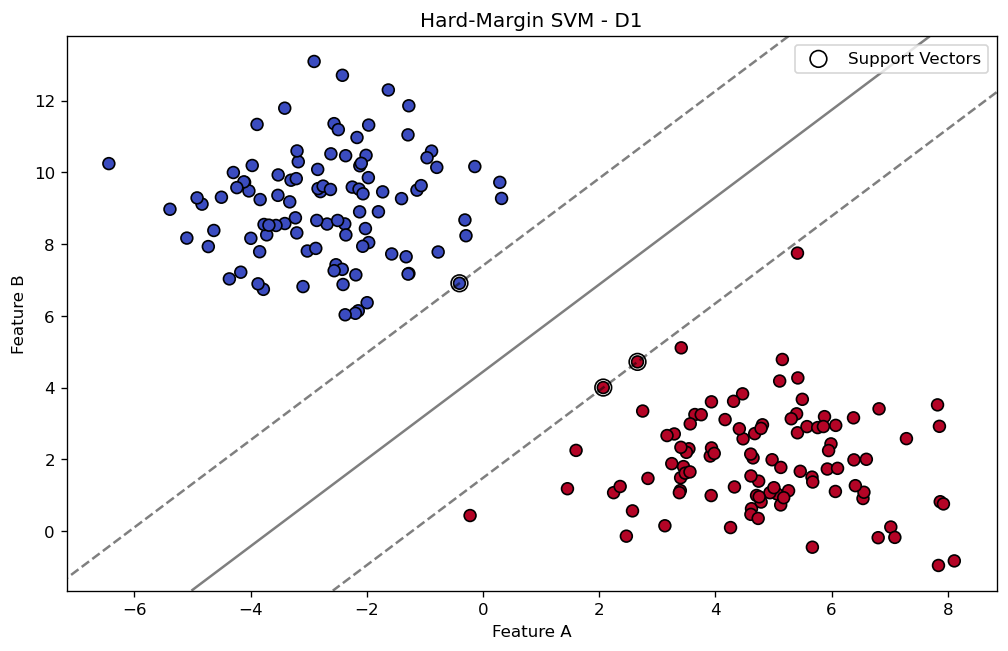

In [2]:
# Apply Hard-Margin SVM (D1)
hardMarginSVM = SVC(kernel='linear', C=1e6)  # Large C value simulates hard margin
hardMarginSVM.fit(trainData1, trainLabels1)

# Visualize decision boundary and support vectors (D1)
plt.figure(figsize=(10, 6), dpi=120)
plt.scatter(data1[:, 0], data1[:, 1], c=labels1, cmap='coolwarm', edgecolor='k', s=50)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = hardMarginSVM.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(hardMarginSVM.support_vectors_[:, 0], hardMarginSVM.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Hard-Margin SVM - D1")
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.legend()
plt.show()

# Evaluate on test set (D1)
testPredHard = hardMarginSVM.predict(testData1)
accuracyHard = accuracy_score(testLabels1, testPredHard)


## Classification Using Soft-Margin SVM
The Soft-Margin SVM was applied to the linearly non-separable dataset D2. The model achieved a high level of accuracy on the test set, although it did not perfectly classify all the data points. This demonstrates the Soft-Margin SVM's ability to handle some level of non-separability in the data, though it may struggle with more complex distributions.

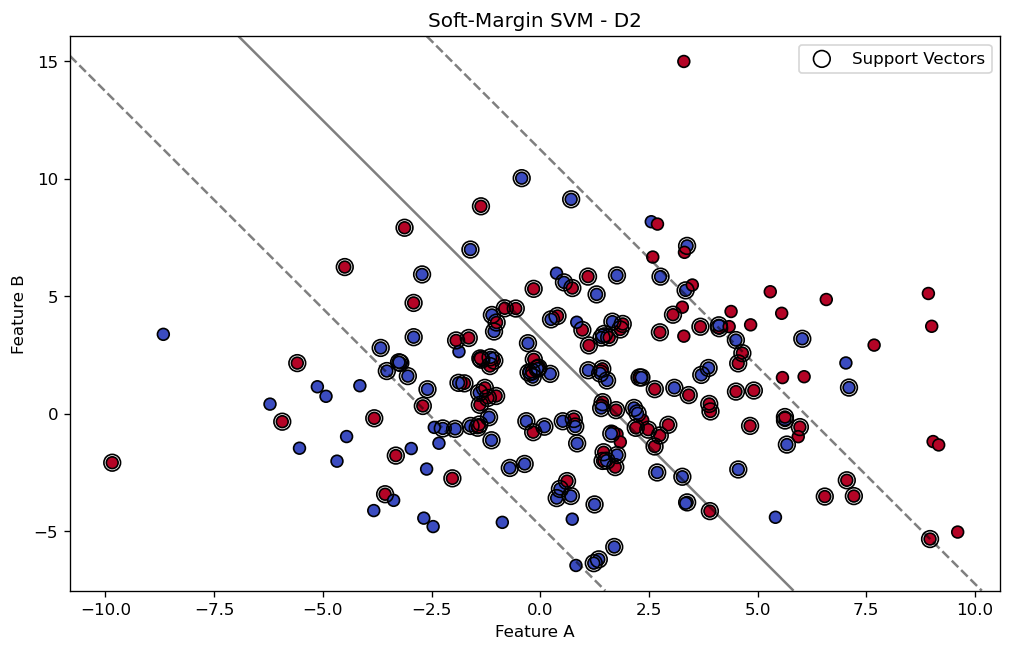

In [3]:
# Apply Soft-Margin SVM (D2)
softMarginSVM = SVC(kernel='linear', C=1.0)
softMarginSVM.fit(trainData2, trainLabels2)

# Visualize decision boundary and support vectors (D2)
plt.figure(figsize=(10, 6), dpi=120)
plt.scatter(data2[:, 0], data2[:, 1], c=labels2, cmap='coolwarm', edgecolor='k', s=50)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = softMarginSVM.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(softMarginSVM.support_vectors_[:, 0], softMarginSVM.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Soft-Margin SVM - D2")
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.legend()
plt.show()

# Evaluate on test set (D2)
testPredSoft = softMarginSVM.predict(testData2)
accuracySoft = accuracy_score(testLabels2, testPredSoft)


## Classification Using Two-Layer MLP
The Two-Layer MLP was tested on both datasets. For the linearly separable dataset D1, the MLP performed flawlessly, matching the perfect classification achieved by the Hard-Margin SVM. However, the MLP showed its strength with the linearly non-separable dataset D2, where it outperformed the Soft-Margin SVM by achieving a higher accuracy. This highlights the MLP's superior capability in modeling complex, non-linear relationships within the data.

In [4]:
# Apply Two-Layer MLP (D1)
mlpD1 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, random_state=42)
mlpD1.fit(trainData1, trainLabels1)

testPredMLPD1 = mlpD1.predict(testData1)
accuracyMLPD1 = accuracy_score(testLabels1, testPredMLPD1)

# Apply Two-Layer MLP (D2)
mlpD2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, random_state=42)
mlpD2.fit(trainData2, trainLabels2)

testPredMLPD2 = mlpD2.predict(testData2)
accuracyMLPD2 = accuracy_score(testLabels2, testPredMLPD2)



print("RESULTS: ")
print(f"Hard-Margin SVM on D1 Test Set Accuracy: {accuracyHard}")
print(f"Soft-Margin SVM on D2 Test Set Accuracy: {accuracySoft}")
print(f"Two-Layer MLP on D1 Test Set Accuracy: {accuracyMLPD1}")
print(f"Two-Layer MLP on D2 Test Set Accuracy: {accuracyMLPD2}")


RESULTS: 
Hard-Margin SVM on D1 Test Set Accuracy: 1.0
Soft-Margin SVM on D2 Test Set Accuracy: 0.6
Two-Layer MLP on D1 Test Set Accuracy: 1.0
Two-Layer MLP on D2 Test Set Accuracy: 0.65


## Comparison and Conclusion

When comparing the models on the linearly separable dataset D1, both the Hard-Margin SVM and the Two-Layer MLP achieved perfect classification, each with an accuracy of 1.0. This illustrates that both models are highly effective for such data.

However, the real distinction emerges with the linearly non-separable dataset D2. While the Soft-Margin SVM demonstrated good performance with an accuracy of 0.6, it was the Two-Layer MLP that showed a slight improvement in accuracy with a score of 0.65. This underscores the MLP's enhanced flexibility and its ability to capture intricate patterns in the data, making it a powerful tool for complex classification tasks where the data cannot be easily separated by a linear boundary.

In conclusion, while both SVM and MLP are effective for linearly separable data, the MLP proves to be slightly superior in handling linearly non-separable data due to its ability to learn non-linear decision boundaries through its layered structure. This makes the MLP a robust choice for tasks involving complex data distributions. 